In [48]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers


In [71]:
# Load dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape data
#ANN models expect 1D input
#The original 28x28 are reshaped into 1D arrays of (28 × 28 = 784)
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# Convert to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [30]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [88]:
model = models.Sequential([
    layers.InputLayer(shape=(784,)),  # Input layer
    layers.Dense(128, activation='relu',kernel_regularizer=regularizers.L2(0.01)),   # H layer 1
    layers.Dense(128, activation='relu'),   # H layer 2
    layers.Dense(10, activation='softmax') # Output layer
])
# added regularizer

In [89]:
model.compile(optimizer='adam',  # (most popular optimizer (I guest)
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Batch size 64 return 313/313 - 1s - 2ms/step - accuracy: 0.8890 - loss: 0.3642
Test Accuracy: 88.90%


BS 32 return 313/313 - 1s - 2ms/step - accuracy: 0.8854 - loss: 0.5035
Test Accuracy: 88.54%

added regularizer L2, model not overfitting anymore 313/313 - 0s - 1ms/step - accuracy: 0.8450 - loss: 0.5289
Test Accuracy: 84.50%  

In [90]:
history = model.fit(x_train, y_train,
                    epochs=20,           # Number of epochs
                    batch_size=64,       # Mini-batch size
                    validation_data=(x_test, y_test))  # Validation data


Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7616 - loss: 1.3508 - val_accuracy: 0.8205 - val_loss: 0.6131
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8263 - loss: 0.5890 - val_accuracy: 0.8306 - val_loss: 0.5899
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8392 - loss: 0.5431 - val_accuracy: 0.8251 - val_loss: 0.5752
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8438 - loss: 0.5200 - val_accuracy: 0.8330 - val_loss: 0.5476
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8478 - loss: 0.5020 - val_accuracy: 0.8389 - val_loss: 0.5220
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8533 - loss: 0.4779 - val_accuracy: 0.8364 - val_loss: 0.5375
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8532 - loss: 0.4780 - val_accuracy: 0.8353 - val_loss: 0.5177
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8576 - loss: 0.4657 - val_accuracy: 0.

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:

model.save("drive/MyDrive/Colab Notebooks/f_mnist_model.keras")

In [28]:
#model = tf.keras.models.load_model("drive/MyDrive/Colab Notebooks/f_mnist_model.keras")
# Run this at second times

In [92]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


313/313 - 0s - 2ms/step - accuracy: 0.8458 - loss: 0.5007
Test Accuracy: 84.58%


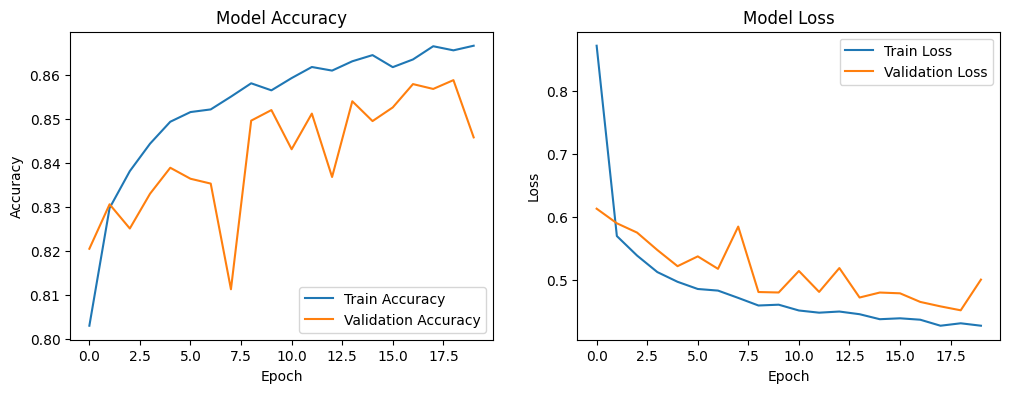

In [93]:
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [94]:
predictions = model.predict(x_test)  # Predict on the test set
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print("Predicted:", predicted_classes[:20])
print("Actual:   ", true_classes[:20])



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted: [9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 2 8 0]
Actual:    [9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0]


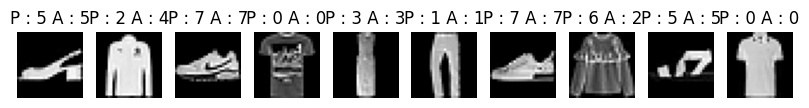

In [95]:
# Select a few test samples
num_samples = 10
indices = np.random.choice(len(x_test), num_samples, replace=False)
plt.figure(figsize=(10,5))
for i, idx in enumerate(indices):
    image = x_test[idx].reshape(28, 28)  # Reshape to original image size
    predicted_label = predicted_classes[idx]
    actual_label = true_classes[idx]

    plt.subplot(2, num_samples, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"P : {predicted_label} A : {actual_label}")
    plt.axis('off')

plt.show()